In [110]:
import numpy as np
import matplotlib.pyplot as plt


In [111]:
def f_true(x):
    return 0.03 * x ** 4 - 0.4 * x ** 2 + 0.7 * np.sin(2.2 * x)

def make_poly_features(x, degree):
    x = np.asarray(x).reshape(-1, 1)
    X = np.hstack([x ** i for i in range(degree + 1)])
    return X

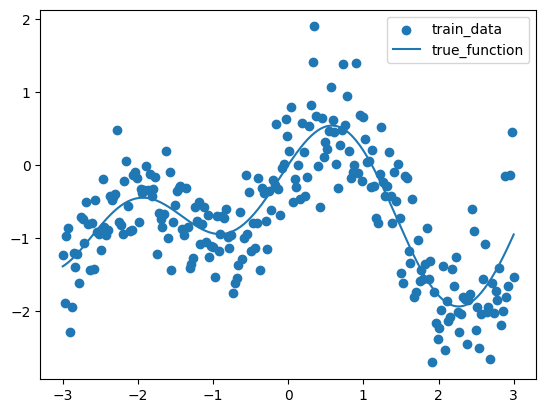

In [112]:
rng = np.random.default_rng(42)

N = 250
x = np.linspace(-3, 3, N)

sigma = 0.5
y = f_true(x) + rng.normal(0, sigma, size=x.shape)

degree = 15
X = make_poly_features(x, degree)

plt.scatter(x, y, label='train_data')
plt.plot(x, f_true(x), label='true_function')
plt.legend()
plt.show()

In [113]:
lamb = 1.0
alpha = 1.0 / (sigma ** 2)

M = X.shape[1]
posterior_cov_inv = lamb * np.eye(M) + alpha * (X.T @ X)

In [114]:
posterior_cov = np.linalg.inv(posterior_cov_inv)
mean = alpha * posterior_cov @ (X.T @ y)

In [115]:
x_new = np.linspace(-3, 3, 400)
X_new = make_poly_features(x_new, degree)

mean_pred = X_new @ mean
var_pred = 1.0 / alpha + np.sum(X_new @ posterior_cov @ X_new.T, axis=1)
std_pred = np.sqrt(var_pred)

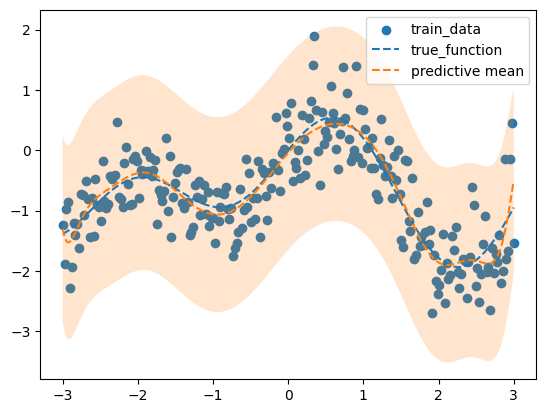

In [116]:
plt.scatter(x, y, label='train_data')
plt.plot(x_new, f_true(x_new), linestyle='--', label='true_function')
plt.plot(x_new, mean_pred, linestyle='--', label='predictive mean')

plt.fill_between(x_new, mean_pred - 2 * std_pred, mean_pred + 2 * std_pred, alpha=0.2)

plt.legend()
plt.show()

In [117]:
def log_evidence(lamb, X, y, alpha):
    '''
    Тут надо написать расчет log-evidence, через формулу, которая была в лекции
    Далее взять какой-то набор лямбд (например np.logspace(-6, 3, 160)) и оценить для каждой эту функцию
    Получится лучшая лябмда
    Вывести график log-evidence vs lambda + графики, чтобы визуально сравнить предсказания базовой модели и модели с лучшей лямбдой
    '''
    
    n = X.shape[0]
    C = (1 / alpha) * np.eye(n) + (1 / lamb) * (X @ X.T)

    _, logdet_C = np.linalg.slogdet(C)

    C_inv = np.linalg.inv(C)
    y_C_inv_y = y @ C_inv @ y

    log_ev = -0.5 * (n * np.log(2 * np.pi) + logdet_C + y_C_inv_y)
    
    return log_ev

In [118]:
lambdas = np.logspace(-6, 3, 160)
log_evidences = [log_evidence(l, X, y, alpha) for l in lambdas]
lambda_optimal = lambdas[np.argmax(log_evidences)]

print(f'Optimal lambda: {lambda_optimal:.7f}')

Optimal lambda: 0.0000738


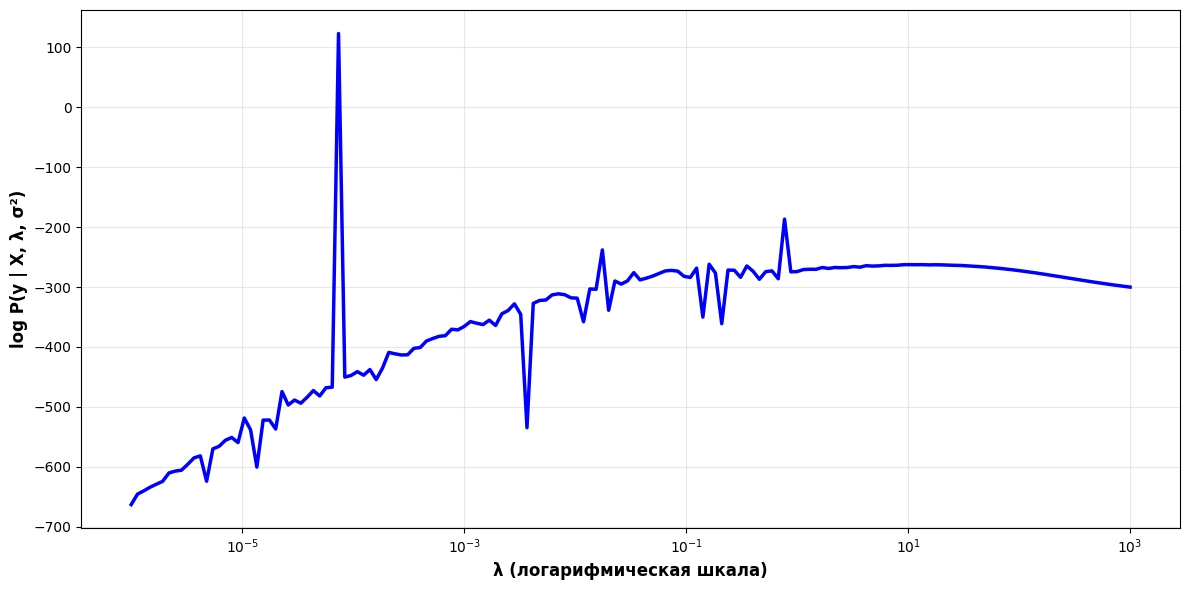

In [119]:
optimal_idx = np.argmax(log_evidences)
lambda_optimal = lambdas[optimal_idx]
max_log_evidence = log_evidences[optimal_idx]

plt.figure(figsize=(12, 6))

plt.semilogx(lambdas, log_evidences, 'b-', linewidth=2.5)

plt.xlabel('λ (логарифмическая шкала)', fontsize=12, fontweight='bold')
plt.ylabel('log P(y | X, λ, σ²)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, which='both')
plt.tight_layout()

plt.show()

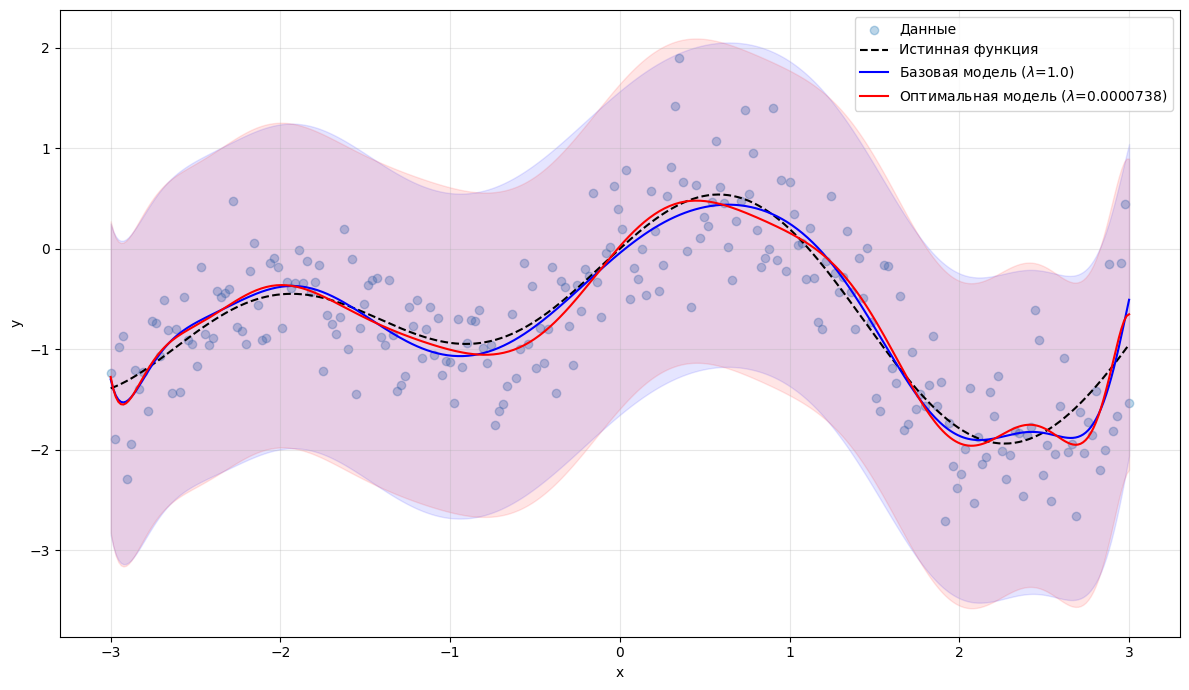

In [120]:
posterior_cov_inv_opt = lambda_optimal * np.eye(M) + alpha * (X.T @ X)
posterior_cov_opt = np.linalg.inv(posterior_cov_inv_opt)
mean_opt = alpha * posterior_cov_opt @ (X.T @ y)

mean_pred_opt = X_new @ mean_opt
var_pred_opt = 1.0 / alpha + np.sum(X_new @ posterior_cov_opt @ X_new.T, axis=1)
std_pred_opt = np.sqrt(var_pred_opt)

plt.figure(figsize=(12, 7))

plt.scatter(x, y, alpha=0.3, label='Данные')
plt.plot(x_new, f_true(x_new), 'k--', label='Истинная функция')

plt.plot(x_new, mean_pred, 'b-', label=f'Базовая модель ($\lambda$={lamb})')
plt.fill_between(x_new, mean_pred - 2 * std_pred, mean_pred + 2 * std_pred, 
                 color='blue', alpha=0.1)

plt.plot(x_new, mean_pred_opt, 'r-', label=f'Оптимальная модель ($\lambda$={lambda_optimal:.7f})')
plt.fill_between(x_new, mean_pred_opt - 2 * std_pred_opt, mean_pred_opt + 2 * std_pred_opt, 
                 color='red', alpha=0.1)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()